<a href="https://colab.research.google.com/github/7z1m15c3/.NET-SDK/blob/master/datavis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualisation and Analysis

In this notebook we'll look at some data acquired from the psychophysics experiments in the labs, and possibly also some more generic data.

We'll be using Python for this, though most of what we're doing is pretty basic and should transfer reasonably easily to environments such as R and Matlab. The code is provided, so if you don't know Python you should still be able to follow along. In some cases we might suggest ways you could tweak the code for different purposes, but you don't *have* to do that.

If in doubt, feel free to ask for help from the tutors.



## Using Colab

Google Colaboratory provides free access to computational resources via a web-based front end known as a **notebook**. There are pros and cons to this approach, but it does have the virtue of providing a consistent software environment for everyone without having to wrestle with installation and configuration woes on dozens of different, subtly-incompatible laptops.

The notebook content is broken down into **cells**, of which there are two basic types:
* **Text** cells (like this one) contain rich text and possibly other media such as images. You should **read** the content of these cells!
* **Code** cells (like the one below) contain program instructions in Python, and sometimes other operating system commands. The latter are typically prefixed by an exclamation mark, like this: `!ls -l`
   
   Code content can be executed on the remote **virtual machine** by clicking on the **play**  ( ▶︎ ) button that appears in the top left hand corner of the cell when you move your cursor over it. Some code may take a while to run — the play button will change to a **stop** (◾️) button, and an animated progress wheel will show around it. As the code runs, it may produce output, which will appear at the bottom of the cell. You can click the stop button to halt the execution.

  (The notebook must be **connected** to a virtual machine in order to run code cells. This should happen automatically the first time you attempt to execute a cell — there will be a delay while this takes place.)

Try clicking the play button on the cell below to run it.

In [1]:
# a very simple example of a code cell
# running the cell will execute the statement below and generate output
print('hello world!')

hello world!


There are two important caveats to be aware of, one to do with the Jupyter notebook interface and the other to do with Colab:

1. The notebook interface allows **out of order execution** of code cells. That is, it is possible to run later cells before earlier ones. This is really **never what you want** and can give rise to all kinds of problems with inconsistent state. Always be sure to run cells in order. If you need to go back and re-run earlier cells (eg, because you want to change something) always follow that up by re-running all the subsequent cells in order too, to make sure everything is consistent.

2. The virtual machine environment that Colab runs behind this notebook interface is **resource-limited** and **transient**. If you don't do anything for awhile, the notebook may disconnect from the virtual machine. If you use too much computation then your session may be halted — and what qualifies as "too much" is kept intentionally vague. VMs are purged daily: if you stop and come back to it tomorrow the VM will have been deleted and you will need to go back to the beginning and go through the setup steps again. If you generate something that you want to keep, you should download it to your local machine.


# Setting Up

We'll be making use of some very standard python packages — [NumPy](https://numpy.org/doc/stable/user/index.html#user), [SciPy](https://docs.scipy.org/doc/scipy/tutorial/general.html), [Pandas](https://pandas.pydata.org/docs/user_guide/index.html), [Matplotlib](https://matplotlib.org/stable/users/index.html), [Seaborn](https://seaborn.pydata.org/index.html) and [Scikit-Learn](https://scikit-learn.org/stable/user_guide.html). These are all sufficiently common that they're part of the default setup on a Colab virtual machine, so we don't have to mess about installing them. But we do have to tell the Python interpreter to import them:

In [2]:
# ubiquitous python packages for data analysis and visualisation
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# this is probably the default, but just in case
%matplotlib inline

sns.set_style('white')
sns.set_style('ticks')

# we'll probably do a little light model fitting too
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression

We're also going to make use of a less standard package for fitting psychometric functions, [psignifit](https://uni-tuebingen.de/en/fakultaeten/mathematisch-naturwissenschaftliche-fakultaet/fachbereiche/informatik/lehrstuehle/neuronale-informationsverarbeitung/research/software/psignifit/). This one is *not* part of the default setup, and also is not available from the python package repository PyPI, so we need to explicitly install it from GitHub.

In [3]:
!pip install https://github.com/wichmann-lab/python-psignifit/zipball/master

     \ 557.5 kB 10.4 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for psignifit: filename=psignifit-4.3-py3-none-any.whl size=38243 sha256=a37fa504ea42b176e265b9b8d9f19ceb7eb0f56a23f0182fc110db64b3ac2291
  Stored in directory: /tmp/pip-ephem-wheel-cache-k3mxynnj/wheels/97/20/6a/155d0fc2116beb08996152166cf2fab1dde1101fd985a2c232
Successfully built psignifit


Once again, we'll need to tell the interpreter to import it.

In [4]:
import psignifit as ps
import psignifit.psigniplot as psp

# Data

As well as the code libraries, we'll also need some data to look at. For simplicity we'll fetch some files Matthew prepared earlier, which are available from the module GitHub site.

In [5]:
!git clone https://github.com/comp0160/data.git

Cloning into 'data'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 3), reused 21 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 28.46 KiB | 9.49 MiB/s, done.
Resolving deltas: 100% (3/3), done.


All being well, you should now have a directory called `data`, with some CSV files in it. We can list the contents like this:

In [6]:
!ls data

comp160_lab1_2afc.csv	     comp160_lab2_contrast.csv	      comp160_lab3_stereo.csv
comp160_lab1_2ifc.csv	     comp160_lab2_legibility.csv      LICENSE
comp160_lab1_const_stim.csv  comp160_lab2_stroop.csv	      README.md
comp160_lab1_limits.csv      comp160_lab3_binaural_beats.csv  TNXO.csv
comp160_lab1_react.csv	     comp160_lab3_haas.csv
comp160_lab1_relative.csv    comp160_lab3_pitch.csv


You might recognise some of these file names as outputs from the experiments in Labs 1—3.

You can browse the files on your virtual machine via the little **folder icon** in the sidebar. You can upload and download files there too, for example if you want to **analyse your own data**.

# Getting Started: Pitch

We'll start by having a look at a fairly simple data file, from the pitch detection experiment in Lab 3. We can load the CSV like this:

In [7]:
pitch = pd.read_csv('data/comp160_lab3_pitch.csv')

The variable `pitch` now contains a [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) [DataFrame](https://pandas.pydata.org/docs/user_guide/dsintro.html) object, which is something like a spreadsheet table: a two-dimensional data structure, where each column is some named attribute and each row is a data sample.

We can look at an object in Jupyter by calling `display` on it. This may just print it out as text, but for some kinds of objects (including DataFrames) it may produce something with more complex formatting:

In [8]:
display(pitch)

,rt,direction,ascending,thresh,response,time_elapsed
0,13415,up,1,13415,0,31846
1,9773,down,0,12227,0,43155
2,13862,up,1,13862,0,58530
3,8615,down,0,13385,0,68646
4,13755,up,1,13755,0,83904
5,10080,down,0,11920,0,95487
6,13711,up,1,13711,0,110704
7,9645,down,0,12355,0,121853


Note: `display` is implicitly called on the **return value** from a code cell, which will usually be the last thing in it. So you can achieve the same effect with just:

In [9]:
pitch

,rt,direction,ascending,thresh,response,time_elapsed
0,13415,up,1,13415,0,31846
1,9773,down,0,12227,0,43155
2,13862,up,1,13862,0,58530
3,8615,down,0,13385,0,68646
4,13755,up,1,13755,0,83904
5,10080,down,0,11920,0,95487
6,13711,up,1,13711,0,110704
7,9645,down,0,12355,0,121853


We will make use of this implicit behaviour frequently below, but calling `display` explicitly can sometimes be clearer. And you may want to display things partway through a cell's code, or display more than one thing.

DataFrames have a handy `describe` method which produces some summary statistics on the (numeric) data columns:

In [10]:
pitch.describe()

,rt,ascending,thresh,response,time_elapsed
count,8.000000,8.000000,8.000000,8.0,8.000000
mean,11607.000000,0.500000,13078.750000,0.0,76765.625000
std,2264.363739,0.534522,780.968401,0.0,31919.640425
min,8615.000000,0.000000,11920.000000,0.0,31846.000000
25%,9741.000000,0.000000,12323.000000,0.0,54686.250000
50%,11747.500000,0.500000,13400.000000,0.0,76275.000000
75%,13722.000000,1.000000,13722.000000,0.0,99291.250000
max,13862.000000,1.000000,13862.000000,0.0,121853.000000


Note that the `direction` column is omitted here because it doesn't make sense to calculate things like the mean of "down" and "up".

In this data, the thing we're really interested in is the detection threshold, which is recorded in the column `thresh`. Looking at the mean and median (equivalent to the 50th percentile), this looks *reasonably* consistent at a little over 13 kHz and we could probably just stop there.

Still, recalling the discussion of errors of **habituation** and **anticipation** back in week 1, we might suspect there's some difference according to whether the pitch sweep was ascending or descending.

We can extract **subsets** of data in Pandas DataFrames (and [Series](https://pandas.pydata.org/docs/user_guide/dsintro.html), which are the underlying one-dimensional data structure) by indexing them with **logical conditions**.

The syntax for this can be a bit unintuitive at first, so let's step through it.

Indexing a DataFrame by **column name** returns the Series contained in just that column:

In [11]:
pitch['ascending']

,ascending
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0


If we apply a test to this Series, we get back a new Series whose contents are the results of that test applied to each element of the column:

In [12]:
pitch['ascending'] == 1

,ascending
0,True
1,False
2,True
3,False
4,True
5,False
6,True
7,False


If we use such a Boolean Series to index the original DataFrame, it will pick out only those rows where the Series contains `True`:

In [13]:
pitch[pitch['ascending']==1]

,rt,direction,ascending,thresh,response,time_elapsed
0,13415,up,1,13415,0,31846
2,13862,up,1,13862,0,58530
4,13755,up,1,13755,0,83904
6,13711,up,1,13711,0,110704


This is itself a DataFrame, and we can call `describe` on it just as with the original `pitch`:

In [14]:
pitch[pitch['ascending']==1].describe()

,rt,ascending,thresh,response,time_elapsed
count,4.00000,4.0,4.00000,4.0,4.000000
mean,13685.75000,1.0,13685.75000,0.0,71246.000000
std,191.31366,0.0,191.31366,0.0,33819.202553
min,13415.00000,1.0,13415.00000,0.0,31846.000000
25%,13637.00000,1.0,13637.00000,0.0,51859.000000
50%,13733.00000,1.0,13733.00000,0.0,71217.000000
75%,13781.75000,1.0,13781.75000,0.0,90604.000000
max,13862.00000,1.0,13862.00000,0.0,110704.000000


In the same way, we can look at the descending data:

In [15]:
pitch[pitch['ascending']!=1].describe()

,rt,ascending,thresh,response,time_elapsed
count,4.000000,4.0,4.000000,4.0,4.000000
mean,9528.250000,0.0,12471.750000,0.0,82285.250000
std,635.606469,0.0,635.606469,0.0,33946.519943
min,8615.000000,0.0,11920.000000,0.0,43155.000000
25%,9387.500000,0.0,12150.250000,0.0,62273.250000
50%,9709.000000,0.0,12291.000000,0.0,82066.500000
75%,9849.750000,0.0,12612.500000,0.0,102078.500000
max,10080.000000,0.0,13385.000000,0.0,121853.000000


(Here I've specified `!=1` as the condition just to illustrate the **does not equal** operator, but this could just as easily have been specified as `==0`.)

Comparing these two summaries, it definitely looks like there's some difference between the threshold estimated from the ascending sweep — around 13.7 kHz — and that from the downward sweep — about 12.5 kHz. This does suggest some degree of habituation — the subject is more inclined to think they can *still* hear the rising sound and still *can't* hear the descending one.

This data set is pretty small, though, with only four samples in each direction. That might not be enough to persuade us that the apparent difference is real, rather than just an accident of measurement noise. One way we can assess this is with a [two sample t-test](https://en.wikipedia.org/wiki/Student%27s_t-test). This, along with a lot of other statistical tests, distributions and models is provided by the [`scipy.stats`]() package:

In [16]:
stats.ttest_ind(pitch['thresh'][pitch['ascending']==0], pitch['thresh'][pitch['ascending']==1])

TtestResult(statistic=-3.657869109619764, pvalue=0.010606347309377201, df=6.0)

Hypothesis testing is a fraught business and $p$ values are the last refuge of the scoundrel. Student $t$ tests are perhaps the single most commonly used significance test, and by the same token probably the most *abused*. As a general rule you should be suspicious of claims that the outcome of such a test *proves* anything — and especially of the implication that there's anything magical about arbitrary significance thresholds such a $p < 0.05$ or $p < 0.01$.

In this case we have $p$ marginally above 0.01. Is that significant? Maybe, maybe not. With so few samples it's hard to be sure, but we might have a sense that there's something going on there. If it's something we care about, then we could take the t test result as a cue to do more experiments to probe the matter further. As a rule of thumb: it's fine to use things like t tests to help yourself understand the data. It's when you start making grand claims of significance that you need to be cautious.

Another thing we can do to help understand the distribution of the data is to **plot** it. (You may recall being urged in earlier practical sessions to **always plot your data**, and it's not the last time you'll hear that exhortation.)

There are many different ways to plot data, and we'll explore a few of them below, but the main workhorse is the [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot), which just plots one thing against another. This will probably be your first port of call for most data.

Let's make a scatter plot of the threshold values for all our trials:

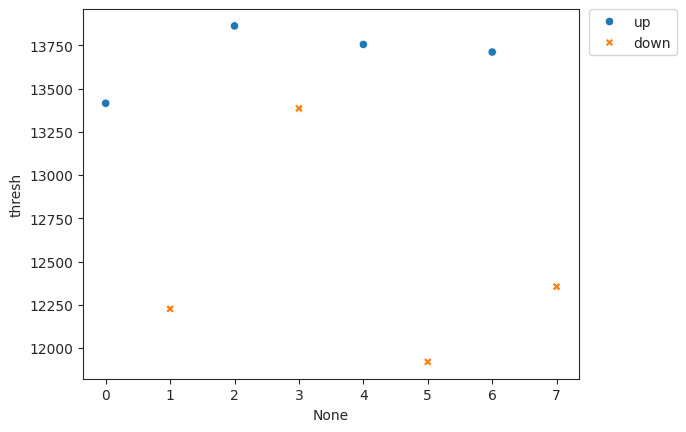

In [17]:
sns.scatterplot(data=pitch, x=pitch.index, y='thresh', style='direction', hue='direction')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

We're using the [Seaborn](https://seaborn.pydata.org/index.html) library here, which provides a slightly nicer interface to the plotting functionality of Matplotlib. One of the things Seaborn supports is specifying how we want to represent particular elements of our dataset in the plot — such as having different markers and colours according to direction. However, controlling things like the position of the legend ultimately falls to Matplotlib — that's what the second line above is for, moving the legend outside the plot so it doesn't obscure any of the data.

This is a pretty straightforward plot, and we can already see that the downward sweep results are consistently lower than the upward ones, which is consistent with our observation above. On the other hand, it looks like there's no particular effect of experiment order here, and our horizontal axis is not so interesting. Maybe we'd be better off putting the direction on that axis?

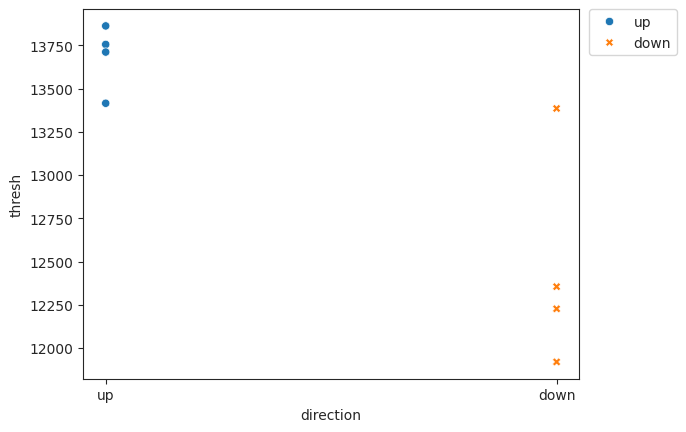

In [18]:
sns.scatterplot(data=pitch, x='direction', y='thresh', style='direction', hue='direction')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

Note that `direction` is not a number, it's a **categorical variable**. Seaborn has correctly inferred that we want to group the data accordingly and has mapped the values `up` and `down` to different locations on the x axis.

There are other ways we might want to represent this data. For example, a [boxplot](https://en.wikipedia.org/wiki/Box_plot) gives a simplified sketch of the data distribution:

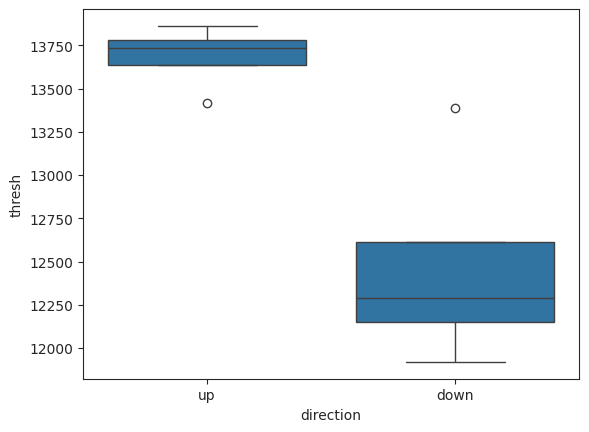

In [19]:
sns.boxplot(data=pitch, x='direction', y='thresh');

This is a good way to summarise larger datasets, but in this case it's probably overkill, since we only have four samples in each box. Presenting the distribution in this form is arguably a bit dishonest — it makes it seem like the distributions are better characterised than they really are. With this few samples it's more informative to see the actual points rather than summarise them.

We've probably got as much out of this little dataset as we're likely to, so let's move on to something a bit bigger.

# More Data: Stroop Test

The pitch detection experiment only had 8 data points and two different experimental conditions, down and up. For the Stroop test we ran more trials, and also had more varied conditions. Let's take a look:

In [20]:
stroop = pd.read_csv('data/comp160_lab2_stroop.csv')
display(stroop)
stroop.describe()

,rt,colour,idx,word,congruence,congruence_num,target,response,correct_response,time_elapsed
0,677,#eae813,1,water,neutral,0,colour,arrowup,arrowleft,30186
1,557,#eae813,1,migraine,neutral,0,colour,arrowup,arrowup,32247
2,417,#8a25d8,2,cardamom,neutral,0,colour,arrowright,arrowright,34168
3,565,#ff2a60,0,aardvark,neutral,0,colour,arrowleft,NaN,36236
4,849,#8a25d8,2,triangle,neutral,0,colour,arrowright,NaN,38590
...,...,...,...,...,...,...,...,...,...,...
100,857,#eae813,1,purple,incongruent,-1,word,arrowright,arrowright,291155
101,695,#8a25d8,2,red,incongruent,-1,word,arrowleft,arrowleft,293353
102,737,#ff2a60,0,yellow,incongruent,-1,word,arrowup,arrowup,295593
103,634,#ff2a60,0,red,congruent,1,word,arrowleft,arrowleft,297730


,rt,idx,congruence_num,time_elapsed
count,105.00000,105.000000,105.000000,105.000000
mean,893.32381,0.990476,-0.285714,164761.276190
std,242.28065,0.826197,0.884854,83048.995025
min,417.00000,0.000000,-1.000000,30186.000000
25%,733.00000,0.000000,-1.000000,92397.000000
50%,851.00000,1.000000,-1.000000,158432.000000
75%,992.00000,2.000000,1.000000,239956.000000
max,1671.00000,2.000000,1.000000,299955.000000


Note how the display gets truncated for long DataFrames, to avoid filling the page with stuff you probably don't want to wade through.

We can see from the summary table that there's really only one relevant numeric variable in this experiment, the reaction time `rt`. Let's start by taking a look at that.

We could use another boxplot to get a rough idea of the distribution of reaction times, but let's try a histogram instead:

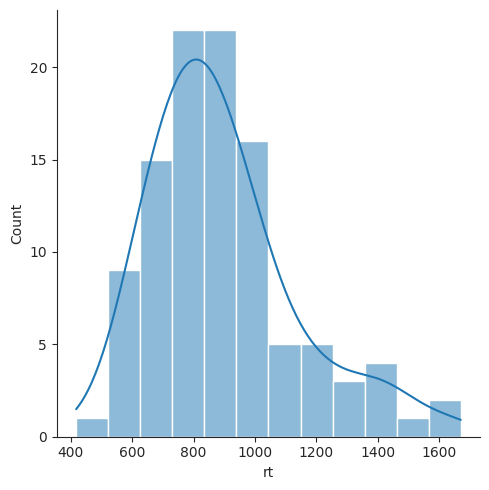

In [21]:
sns.displot(data=stroop, x='rt', kde=True);

(The `kde=True` parameter enables [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation), which is what produces the smoothed curve overlaid on the bars.)

It's hard to be sure, but it looks like this distribution might have more than one **mode**. Since we know the experiment involved different phases with different conditions, it would make sense for the results to occupy different groups. We might try a scatter plot to see if it makes things any clearer:

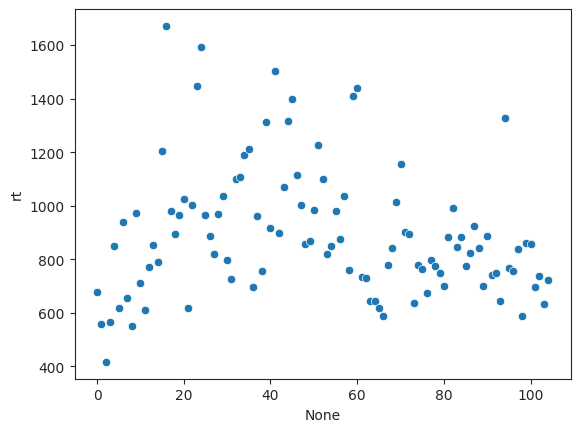

In [22]:
sns.scatterplot(data=stroop, x=stroop.index, y='rt');

Once again, we can get some sense that things are varying, but we don't yet have the information to unpick it. So let's bring in some more of that information.

Most of the other columns in the data are telling us about the experimental conditions and the subject's response. Unfortunately, looking at the rows above we can see that there are some errors and omissions that we ought to clean up first.

In [23]:
display(stroop.iloc[:20,])

,rt,colour,idx,word,congruence,congruence_num,target,response,correct_response,time_elapsed
0,677,#eae813,1,water,neutral,0,colour,arrowup,arrowleft,30186
1,557,#eae813,1,migraine,neutral,0,colour,arrowup,arrowup,32247
2,417,#8a25d8,2,cardamom,neutral,0,colour,arrowright,arrowright,34168
3,565,#ff2a60,0,aardvark,neutral,0,colour,arrowleft,NaN,36236
4,849,#8a25d8,2,triangle,neutral,0,colour,arrowright,NaN,38590
5,617,#8a25d8,2,picture,neutral,0,colour,arrowright,NaN,40711
6,941,#eae813,1,football,neutral,0,colour,arrowup,NaN,43157
7,657,#8a25d8,2,kazoo,neutral,0,colour,arrowright,NaN,45317
8,550,#ff2a60,0,carousel,neutral,0,colour,arrowleft,NaN,47372
9,972,#eae813,1,piano,neutral,0,colour,arrowup,NaN,49847


In the first stage, with neutral words, the `correct_response` field is wrong or missing. We'll have to fill in these values. Fortunately, the information is present elsewhere in the row: the `idx` field tells us what colour was used, so we can set the correct response accordingly. As it happens, the correctly indexed values are actually the first three in this column — this is a serendipitous side effect of the bug that caused this data to be wrong in the first place. (In general you will not be able to rely on such an accident and will need to get the data wherever you can. For a simple case like this that wouldn't be onerous, but data cleaning can sometimes be very difficult, time-consuming and tedious.) We can make use of this to get the right values for this stretch:

In [24]:
correct_neutrals = stroop['correct_response'][stroop['idx'][:15]].values
correct_neutrals

array(['arrowup', 'arrowup', 'arrowright', 'arrowleft', 'arrowright',
       'arrowright', 'arrowup', 'arrowright', 'arrowleft', 'arrowup',
       'arrowleft', 'arrowleft', 'arrowright', 'arrowleft', 'arrowleft'],
      dtype=object)

The nested indexing above will probably seem a bit confusing, so let's pause to unpick it:

* `stroop['correct_response']` gives us the whole `correct_response` column. We only care about the first three elements of this, but we also know that the `idx` column only contains the values 0, 1 and 2, so we can just ignore everything after that.
* `stroop['idx'][:15]` gives us the first 15 elements in the `idx` column -- some combination of zeros, ones and twos.
* The whole expression `stroop['correct_response'][stroop['idx'][:15]]` is using that set of zeros, ones and twos to index the correct responses.
* The final `.values` extracts the Pandas Series contents into a simple array. We do this because we don't want to keep the index values associated with each element.

We can now assign these fixed values back into the original data frame. There are a number of ways to do this, but for annoying reasons to do with the underlying Pandas implementation, the more intuitive ones will give a warning (though they'll still usually work).

Probably the least terrible "officially approved" way looks like this:


In [25]:
stroop.loc[stroop.iloc[:15].index, 'correct_response'] = correct_neutrals

It's pretty ugly, though. You'd think that a simple `:15` would suffice for that first index, but no. In fact, `:14` would actually work, but that's just unacceptably confusing.

Okay, now we have the right right answers, let's add a new column to say whether each row is correct:

In [26]:
stroop['correct'] = (stroop['response'] == stroop['correct_response'])

And now let's add that info into our scatter plot, along with the congruence and target:

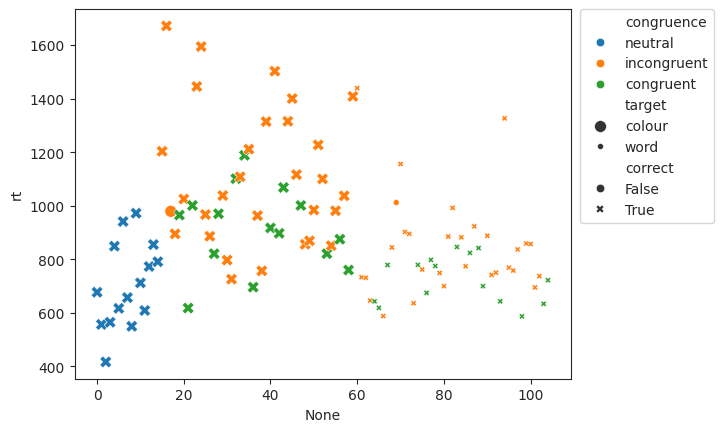

In [27]:
sns.scatterplot(data=stroop, x=stroop.index, y='rt', style='correct', hue='congruence', size='target')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

It definitely seems like things fall into different groups, but now there's probably a bit too much going on.

For starters, after all that effort to get the right answers, there probably aren't enough incorrect responses to worry about anyway:

In [28]:
np.sum(~stroop['correct'])

2

It probably wouldn't do any harm to leave these two in the data, but let's restrict ourselves to right answers.

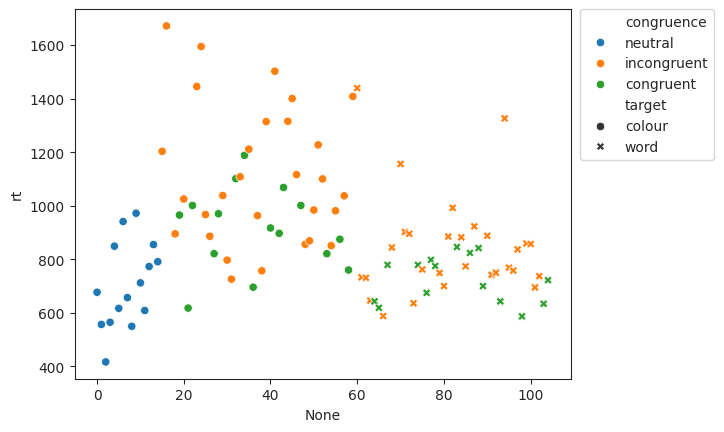

In [29]:
stroop_ok = stroop[stroop['correct']]

sns.scatterplot(data=stroop_ok, x=stroop_ok.index, y='rt', style='target', hue='congruence')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

By eye, it seems like the early neutral stimuli tend to get faster responses than the later ones where both the verbal and the visual content are vying for attention. And incongruent stimuli tend to get slower responses than congruent. We can break down these groups in a boxplot to confirm the visual impression:

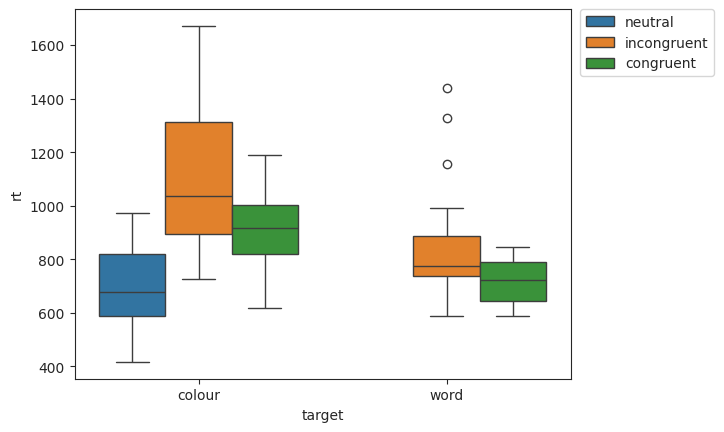

In [30]:
sns.boxplot(data=stroop_ok, x='target', y='rt', hue='congruence')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

Once again, these apparent differences could still be the result of random variation. We might like to run a few $t$ tests to check whether there's really any difference. However, this is something that needs to done with caution, especially if you're going to make any claims about significance. The problem with [multiple comparisons](https://en.wikipedia.org/wiki/Multiple_comparisons_problem) is that sooner or later *some* of your tests will come up positive just by chance, even when there's no real phenomenon underlying the observations.

Multiple comparisons and [spurious correlations](https://www.tylervigen.com/spurious-correlations) can be a big issue when people go on **fishing expeditions**, trawling through huge datasets in search of patterns to exploit. This is something that plagues data mining, especially in grubbier financial contexts where people want to sell you **secret knowledge** that will let you **get rich quick**.

Obviously that isn't the case here.

There are a variety of strategies for combatting multiple comparisons, of which possibly the simplest and most widely used is the [Bonferroni correction](https://en.wikipedia.org/wiki/Bonferroni_correction), which basically divides the significance by the number of tests performed. So if you want to perform a significance test for $p < 0.05$ on 5 different data relationships you actually require $p < 0.01$ on each test for it to count. (Equivalently, you can multiply the p-values by the number of tests and keep the original threshold.) The more things you test, the harder it is for any of them to reach the threshold of significance.

Here we again don't care about significance, we're just getting a feel for the data. We'll do a few $t$ tests with Bonferroni corrections, but avoid claims of significance anyway.

In [31]:
rt_neutrals = stroop_ok[stroop_ok['congruence']=='neutral']['rt'].values
rt_colour = stroop_ok[stroop_ok['target']=='colour']['rt'].values
rt_congruent = stroop_ok[stroop_ok['congruence']=='congruent']['rt'].values
rt_incongruent = stroop_ok[stroop_ok['congruence']=='incongruent']['rt'].values
rt_congruent_colour = stroop_ok[(stroop_ok['congruence']=='congruent') & (stroop_ok['target']=='colour')]['rt'].values
rt_incongruent_colour = stroop_ok[(stroop_ok['congruence']=='incongruent') & (stroop_ok['target']=='colour')]['rt'].values
rt_word = stroop_ok[stroop_ok['target']=='word']['rt'].values
rt_congruent_word = stroop_ok[(stroop_ok['congruence']=='congruent') & (stroop_ok['target']=='word')]['rt'].values
rt_incongruent_word = stroop_ok[(stroop_ok['congruence']=='incongruent') & (stroop_ok['target']=='word')]['rt'].values

n_test = 6
print(f'neutral vs colour: {stats.ttest_ind(rt_neutrals, rt_colour)[1] * n_test:.4f}')
print(f'neutral vs word: {stats.ttest_ind(rt_neutrals, rt_word)[1] * n_test:.4f}')
print(f'colour vs word: {stats.ttest_ind(rt_colour, rt_word)[1] * n_test:.4f}')
print(f'congruent vs incongruent: {stats.ttest_ind(rt_congruent, rt_incongruent)[1] * n_test:.4f}')
print(f'congruent colour vs incongruent colour: {stats.ttest_ind(rt_congruent_colour, rt_incongruent_colour)[1] * n_test:.4f}')
print(f'congruent word vs incongruent word: {stats.ttest_ind(rt_congruent_word, rt_incongruent_word)[1] * n_test:.4f}')



neutral vs colour: 0.0050
neutral vs word: 0.3052
colour vs word: 0.0072
congruent vs incongruent: 0.0183
congruent colour vs incongruent colour: 0.0541
congruent word vs incongruent word: 0.1594


Probably those results pretty much accord with what you inferred by eye from the boxplot: some of the distributions were a bit further away than others.

Of course, there could always be other causes not captured in the experimental data. Perhaps there were a lot of environmental distractions during the colour trials and things calmed down in time for the word versions?

# Model Fitting

So far we've picked out some qualitative differences in the data and estimated some stats. But we haven't tried to figure out a quantitative relationship between the measured variables, or fit a line or curve to the relationship.

Let's see if we can do that with some threshold data.

,rt,colour,response,time_elapsed
0,1214,10,1,87010
1,949,18,1,91470
2,1310,9,1,95797
3,1075,7,0,100138
4,878,13,1,103529
...,...,...,...,...
75,739,12,1,7780091
76,870,11,1,7783724
77,797,19,1,7787782
78,681,7,1,7791475


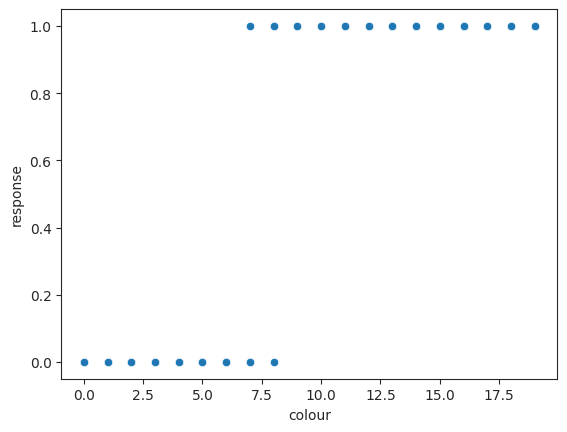

In [32]:
stim = pd.read_csv('data/comp160_lab1_const_stim.csv')
display(stim)
stim.describe()
sns.scatterplot(data=stim, x='colour', y='response');


This scatter plot is a bit unclear because results from repeated trials are plotted on top of one another. One way around this is to add a bit of jitter.

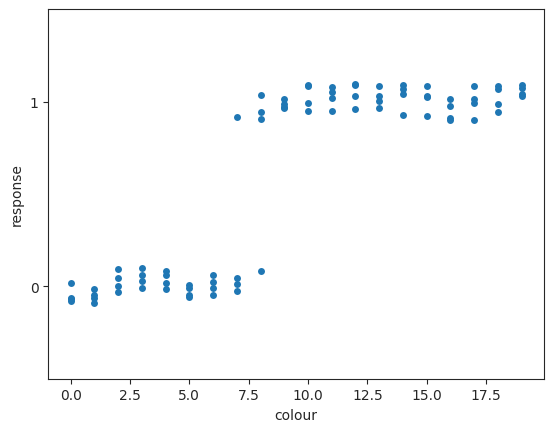

In [33]:
sns.stripplot(data=stim, x='colour', y='response', orient='h', order=[1, 0]);

But we're probably more interested in the **mean** of all the trials at each colour value. We can get this by [grouping](https://pandas.pydata.org/docs/user_guide/groupby.html) the data:

In [34]:
grpd = stim.groupby(['colour']).mean()
display(grpd)

,rt,response,time_elapsed
colour,,,
0,937.00,0.00,3940776.75
1,1027.25,0.00,3940787.00
2,1192.50,0.00,3949541.25
3,1196.25,0.00,3943293.50
4,956.75,0.00,3926335.50
5,1139.25,0.00,3947144.75
6,1052.75,0.00,3940862.50
7,963.25,0.25,2101317.00
8,740.50,0.75,3945531.25


We can plot from this new aggregated table just like the original, but note that the column we grouped on, `colour`, is no longer a column in the new table, it's the table's index.

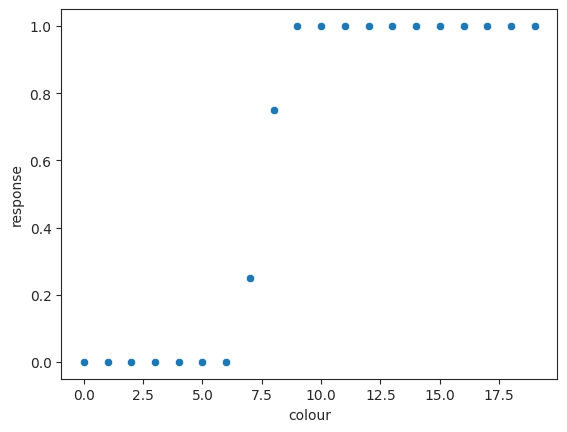

In [35]:
sns.scatterplot(data=grpd, x=grpd.index, y='response');

## Linear Regression

So, we have our data and we want to fit a model to it. The simplest kind of model we're likely to want to fit is a *linear* one: where the output value is just a weighted sum of the inputs (plus a constant intercept, usually). For a scalar input, like `colour` here, and scalar output (like `response`) this just produces a straight line. More complex models might produce planes or hyperplanes, but the basic idea is the same.

The standard method for this is known as **linear regression**. Fitting a straight line by linear regression is *extremely* common. Excel will do it for you, for example. And Seaborn will too. Eg, to the original data:

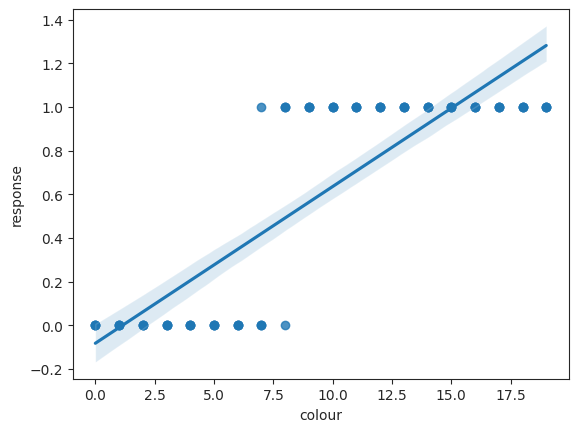

In [36]:
sns.regplot(data=stim, x='colour', y='response');

Or, equivalently to the grouped averages:

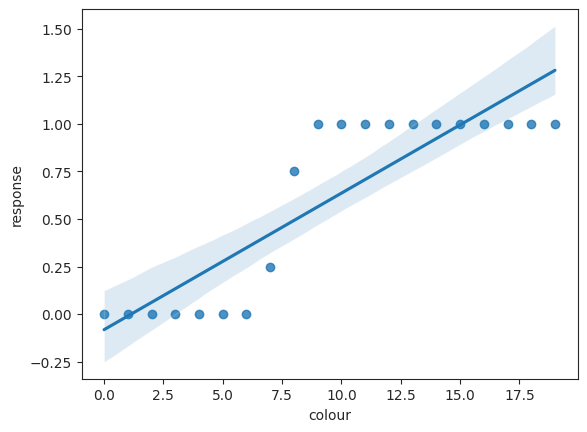

In [37]:
sns.regplot(data=grpd, x=grpd.index, y='response');

Fun fact: in this case both versions of the dataset produce the same fit. That's not always the case. For example, if the groups were different sizes then the fit would probably be different.

Rather than just letting Seaborn plot a line, we can use the [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model from [Scikit-Learn](https://scikit-learn.org/stable/user_guide.html) to do the fitting explicitly. One minor wrinkle: Scikit-Learn models can have multiple input features, so they expect to be passed a 2D array of input data. The `reshape(-1,1)` in the call below does that, converting an n-vector into an 1xn matrix.

In [38]:
linear = LinearRegression()
linear.fit(stim['colour'].values.reshape(-1,1), stim['response'])
print(f'slope: {linear.coef_[0]:.4f}, intercept: {linear.intercept_:.4f}')

slope: 0.0718, intercept: -0.0821


Once again, if we fit to the grouped data we get the same result:

In [39]:
lin_mean = LinearRegression()
lin_mean.fit(grpd.index.values.reshape(-1,1), grpd['response'])
print(f'slope: {lin_mean.coef_[0]:.4f}, intercept: {lin_mean.intercept_:.4f}')

slope: 0.0718, intercept: -0.0821


## Logistic Regression

The slight problem with the simple linear model fitted above is that it's just *obviously rubbish*. The response variable can't be less than 0 or greater than 1 — either you saw the spot or you didn't.

We know from Lecture 1 that for these kind of threshold detection tests we expect the **psychometric function** to take a roughly S-shaped or **sigmoidal** form. A variety of such functions are used, but one very popular choice is the **logistic** or **sigmoid function**:
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
Fitting this function to data is another very common machine learning model, often used for [binary classification](https://en.wikipedia.org/wiki/Binary_classification).

Once again, Scikit-Learn has us covered, with the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model. We can fit this almost exactly as we did the linear regression model above. (Note that LogisticRegression expects the measured values to be 0 or 1, so we'll use the original measurements rather than the grouped means to fit here.)

In [40]:
logistic = LogisticRegression()
logistic.fit(stim['colour'].values.reshape(-1,1), stim['response']);

To plot the fit, we'll use the model to make predictions for a bunch of different values and plot those. LogisticRegression supports two kinds of predictions: label predictions (with the method `predict`), which are 0 or 1, and probability predictions (with `predict_proba`) which are continuous in [0, 1]. We want to plot the smooth curve, so we'll use the latter:

fitted threshold: 7.5377


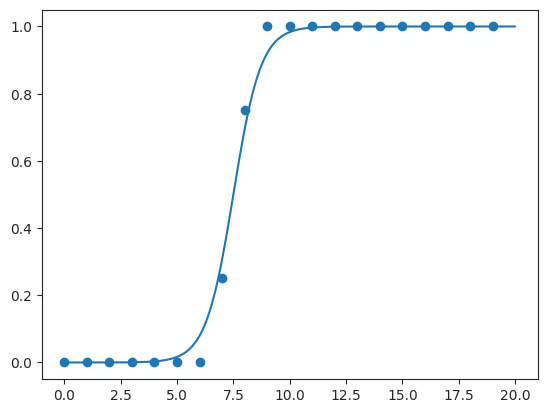

In [41]:
pred_x = np.linspace(0, 20, 200)
pred_y = logistic.predict_proba(pred_x.reshape(-1,1))[:,1]

plt.plot(pred_x, pred_y)
plt.scatter(grpd.index, grpd['response'])

print(f'fitted threshold: {pred_x[pred_y >= 0.5][0]:.4f}')

## psignifit

Logistic regression is a good and versatile model and its fit to this particular dataset is excellent. Psychophysics data can often be a lot dirtier than this, though, and more sophisticated domain-specific fitting may give better results. The [psignifit](https://github.com/wichmann-lab/python-psignifit/wiki/Basic-Usage) library is designed specifically for fitting psychometric functions to [overdispersed](https://www.sciencedirect.com/science/article/pii/S0042698916000390) data.

The library expects the data to be provided in a slightly form, as an array with three columns representing: **stimulus value**, **number of correct trials**, **total number of trials**. We can construct this fairly easily from our grouped data:

In [42]:
levels = grpd.index.values
hits = grpd['response'].values * 4
totals = np.ones_like(hits) * 4
psg_data = np.stack([levels, hits, totals]).T

We need to tell psignifit what kind of experiment we want it to fit, and then we can just let it do its stuff. (Note that psignifit is significantly slower than logistic regression and will throw up a few warnings with this dataset. Just bear with it.)

In [43]:
psg_fit = ps.psignifit(psg_data, experiment_type='yes/no')

/usr/local/lib/python3.11/dist-packages/psignifit/psignifit.py:161: UserWarning: All provided data blocks contain <= 5 trials.
            Did you sample adaptively?
            If so please specify a range which contains the whole psychometric function in
            conf.stimulus_range.
            An appropriate prior prior will be then chosen. For now we use the standard
            heuristic, assuming that the psychometric function is covered by the stimulus
            levels, which is frequently invalid for adaptive procedures!
  warnings.warn("""All provided data blocks contain <= 5 trials.


We can extract the fitted threshold from the `parameter_estimate` dictionary of the resulting object:

In [44]:
print(f'threshold: {psg_fit.parameter_estimate["threshold"]:.4f}')

threshold: 7.4991


It's marginally different from the one we got from logistic regression, although in this case they're very close: the data is not ambiguous.

We can also generate a plot of the fit. Again, it's very similar to logistic regression in this case.

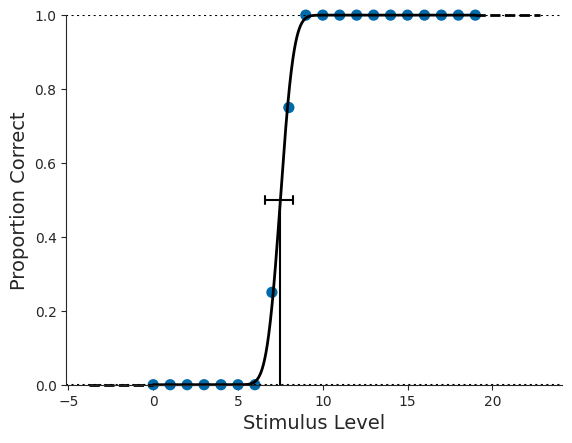

In [45]:
psp.plot_psychometric_function(psg_fit);

# Over to you...

At this point you should have a sense of a few options for basic analysis of psychophysics data. Now it's your turn to try them out on your own data, or tweak them to investigate other aspects.

As always, feel free to ask the tutors if you have any queries.

In [ ]:
limit = pd.read_csv('data/comp160_lab1_limits.csv')
display(limit)
stim.describe()
sns.scatterplot(data=limit, x='colour', y='response');
